In [1]:
%matplotlib inline

import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


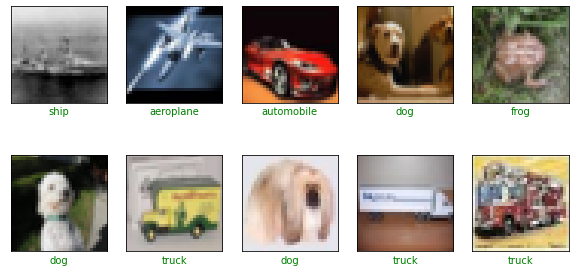

In [3]:
class_names = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_train, y_train, y_train)

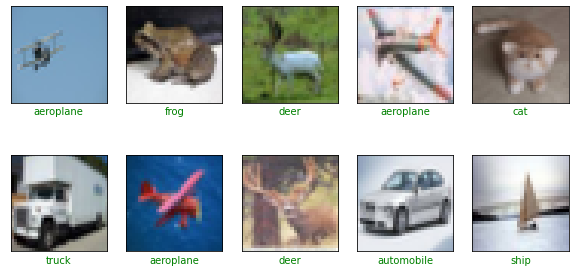

In [4]:
show_random_examples(x_test, y_test, y_test)

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    
    def add_conv_block(model, num_filters):
        
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu', padding='valid'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.2))

        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32, 32, 3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)

    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 15, 15, 64)       

In [8]:
%%time

h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=20, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2),
        tf.keras.callbacks.ModelCheckpoint('models/model_{val_accuracy:.3f}.h5', save_best_only=True,
                                          save_weights_only=False, monitor='val_accuracy')
    ]
)

Epoch 1/20
391/391 [==============================] - 13s 33ms/step - loss: 1.4851 - accuracy: 0.4722 - val_loss: 2.5598 - val_accuracy: 0.2764
Epoch 2/20
391/391 [==============================] - 12s 31ms/step - loss: 1.0341 - accuracy: 0.6344 - val_loss: 1.1466 - val_accuracy: 0.6143
Epoch 3/20
391/391 [==============================] - 12s 31ms/step - loss: 0.8508 - accuracy: 0.7002 - val_loss: 0.8056 - val_accuracy: 0.7187
Epoch 4/20
391/391 [==============================] - 12s 31ms/step - loss: 0.7392 - accuracy: 0.7403 - val_loss: 0.7807 - val_accuracy: 0.7257
Epoch 5/20
391/391 [==============================] - 12s 31ms/step - loss: 0.6760 - accuracy: 0.7643 - val_loss: 0.7968 - val_accuracy: 0.7269
Epoch 6/20
391/391 [==============================] - 12s 31ms/step - loss: 0.6171 - accuracy: 0.7850 - val_loss: 0.7909 - val_accuracy: 0.7323
Epoch 7/20
391/391 [==============================] - 12s 31ms/step - loss: 0.5747 - accuracy: 0.7992 - val_loss: 0.7202 - val_accuracy:

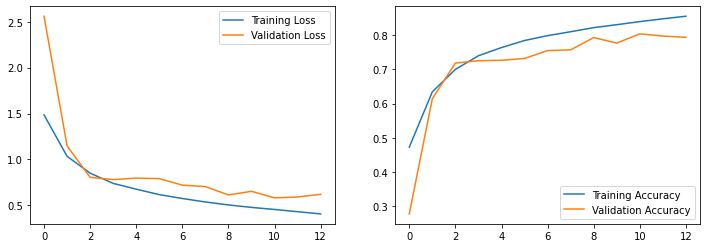

In [9]:
losses = h.history['loss']
accs = h.history['accuracy']
val_losses = h.history['val_loss']
val_accs = h.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(12, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [10]:
model = tf.keras.models.load_model('models/model_0.805.h5')
preds = model.predict(x_test/255.)

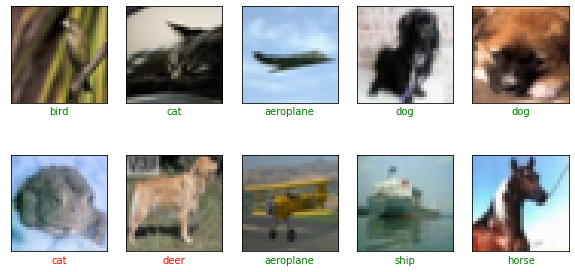

In [11]:
show_random_examples(x_test, y_test, preds)

In [12]:
!wget https://static01.nyt.com/images/2019/04/02/science/28SCI-ZIMMER1/28SCI-ZIMMER1-superJumbo.jpg

--2020-07-16 07:39:08--  https://static01.nyt.com/images/2019/04/02/science/28SCI-ZIMMER1/28SCI-ZIMMER1-superJumbo.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 551233 (538K) [image/jpeg]
Saving to: ‘28SCI-ZIMMER1-superJumbo.jpg’

28SCI-ZIMMER1-super 100%[===================>] 538.31K  --.-KB/s    in 0.08s   

2020-07-16 07:39:08 (6.34 MB/s) - ‘28SCI-ZIMMER1-superJumbo.jpg’ saved [551233/551233]



In [13]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image = load_img('28SCI-ZIMMER1-superJumbo.jpg', target_size = (32, 32)) # input tensor needs to be (32, 32, 3)
image = np.array(image) / 255. # because this is the normalization we did while training the model
image = np.expand_dims(image, axis=0) # image is now shaped (1, 32, 32, 3)

pred = model.predict(image)[0] # we just have one example so we just need to look at index = 0

In [14]:
print(pred)
predicted_index = np.argmax(pred)
print(class_names[predicted_index])

[9.0322271e-03 4.6936753e-03 5.5375893e-02 7.6112457e-02 5.2172009e-02
 5.9100527e-02 7.3388153e-01 2.5157251e-03 3.8122176e-04 6.7346939e-03]
frog


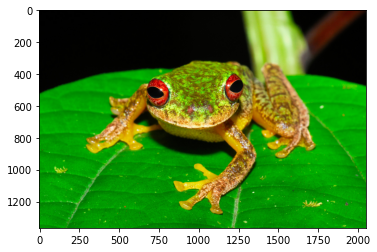

In [15]:
plt.imshow(plt.imread('/content/28SCI-ZIMMER1-superJumbo.jpg'))
plt.show()